# Statistical Learning Project

## Steps and Tasks

### Task 1: Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from numpy import percentile
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

### Task 2: Read the data as a data frame

In [2]:
mydata=pd.read_csv('insurance.csv')
mydata.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Task 3: Perform basic EDA which should include the following and print out your insights at every step

#### Task 3.A Shape of the data

    Answer: This concludes that the dataframe contains 1338 rows and 7 columns

In [3]:
mydata.shape

(1338, 7)

In [4]:
mydata.size

9366

#### Task 3.B Data type of each attribute

    Answer: This concludes that age, children are of integer type(whole number, without decimals), BMI and Charges 
    are of float type (number with decimals), and others (sex, smoker, region) are of object type. Python object
    type can hold any value such as string, integer, float, etc.
                    

In [5]:
mydata.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### Task 3.C Checking the presence of missing values

    Answer: Missing values can be either null or special values or of unexpected data types. So we need to identify both null values in the given dataframe, the special values like "n/a","na","-","--", etc. and values with unexpected data types.
    
    
    - First, we will check number of values in columns
    - Secondly, we will check the null values in the dataframe
    - Thirdly, we will make a list of possible missing values and then check if any of these present in the 
      dataframe
    - Lastly, we will check data which is not of the data type it supposed to be. In the present scenario, 
      if age/bmi/children/charges is not a number, we need to consider it as missing value and also we need to 
      check if sex is any other value than male/female, if smoker is any other value than yes/no, if region is 
      any other value than east/west/south/north/southwest/southeast/northeast/northwest. For which, first we need 
      to identify data types of every attribute and check if any mismatch in the same.

       # Step 1: Checking number of rows in columns

In [7]:
mydata.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


        - So every column has exact 1338 entries. No missing values in the first view.

In [8]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


        # Step 2: check the null values in the dataframe

In [9]:
mydata.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

            ## So there is no null values in dataframe

        # Step 3: List of possible missing values and then check if any of these present in 
        the dataframe

In [10]:
missing_values=['n/a','na',"-",'--','unknown']
mydata1=pd.read_csv('insurance.csv',na_values=missing_values)
mydata1.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

            ## So there is no missing values in dataframe

      # Step 4: Now we need to identify each attribute's data type and needs to identify those values whose 
      datatype is not similar to the one of each atttribute. If age/bmi/children/charges is not a number, we 
      need to consider it as missing value and also we need to check if sex is any other value than male/female, 
      if smoker is any other value than yes/no, if region is any other value than 
      east/west/south/north/southwest/southeast/northeast/northwest

In [11]:
mydata.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [12]:
count=0
for row in mydata['age']:
    try:
        int(row)
        mydata.loc[count, 'age']!=np.nan
    except ValueError:
        count+=1

In [13]:
count

0

In [14]:
count1=0
for row in mydata['bmi']:
    try:
        int(row)
        mydata.loc[count1, 'bmi']!=np.nan
    except ValueError:
        count1+=1

In [15]:
count1

0

In [16]:
count2=0
for row in mydata['children']:
    try:
        int(row)
        mydata.loc[count2, 'children']!=np.nan
    except ValueError:
        count2+=1

In [17]:
count2

0

In [18]:
count3=0
for row in mydata['charges']:
    try:
        int(row)
        mydata.loc[count3, 'charges']!=np.nan
    except ValueError:
        count3+=1

In [19]:
count3

0

In [20]:
new_df = mydata[mydata["sex"].apply(lambda x:x not in ['male','female'])]
new_df.shape[0]

0

In [21]:
new_df1 = mydata[mydata["smoker"].apply(lambda x:x not in ['yes','no'])]
new_df1.shape[0]

0

In [22]:
new_df2 = mydata[mydata["region"].apply(lambda x:x not in ['east','west','north','south','southwest','southeast','northwest','northeast'])]
new_df2.shape[0]

0

In [23]:
nullvaluesindf=mydata['age'].isnull().sum()+mydata['sex'].isnull().sum()+mydata['bmi'].isnull().sum()+mydata['children'].isnull().sum()+mydata['smoker'].isnull().sum()+mydata['region'].isnull().sum()+mydata['charges'].isnull().sum()
missingvaluesindf=mydata1['age'].isnull().sum()+mydata1['sex'].isnull().sum()+mydata1['bmi'].isnull().sum()+mydata1['children'].isnull().sum()+mydata1['smoker'].isnull().sum()+mydata1['region'].isnull().sum()+mydata1['charges'].isnull().sum()
valuesofnotsamedtype=count+count1+count2+count3+new_df.shape[0]+new_df1.shape[0]+new_df2.shape[0]

print("Conclusion: To sum up the number of missing values:")
print("\n")
print("\t1. Number of null values in df =",nullvaluesindf)
print("\t2. Number of missing values in df =",missingvaluesindf)
print("\t3. Number of values which are of same datatype=",valuesofnotsamedtype)
print("\n")
print("Total number of missing values = sum of point 1, 2 and 3 =",(nullvaluesindf+missingvaluesindf+valuesofnotsamedtype))


Conclusion: To sum up the number of missing values:


	1. Number of null values in df = 0
	2. Number of missing values in df = 0
	3. Number of values which are of same datatype= 0


Total number of missing values = sum of point 1, 2 and 3 = 0


#### Task 3.D 5 point summary of numerical attributes

In [24]:
mydata.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


##### 5 point summary for age

In [25]:
quartiles=percentile(mydata['age'],[25,50,75])
data_min,data_max=mydata['age'].min(),mydata['age'].max()
print('Min: %.3f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % data_max)

Min: 18.000
Q1: 27.000
Median: 39.000
Q3: 51.000
Max: 64.000


##### 5 point summary for bmi

In [26]:
quartiles1=percentile(mydata['bmi'],[25,50,75])
data_min1,data_max1=mydata['bmi'].min(),mydata['bmi'].max()
print('Min: %.3f' % data_min1)
print('Q1: %.3f' % quartiles1[0])
print('Median: %.3f' % quartiles1[1])
print('Q3: %.3f' % quartiles1[2])
print('Max: %.3f' % data_max1)

Min: 15.960
Q1: 26.296
Median: 30.400
Q3: 34.694
Max: 53.130


##### 5 point summary for children

In [27]:
quartiles2=percentile(mydata['children'],[25,50,75])
data_min2,data_max2=mydata['children'].min(),mydata['children'].max()
print('Min: %.3f' % data_min2)
print('Q1: %.3f' % quartiles2[0])
print('Median: %.3f' % quartiles2[1])
print('Q3: %.3f' % quartiles2[2])
print('Max: %.3f' % data_max2)

Min: 0.000
Q1: 0.000
Median: 1.000
Q3: 2.000
Max: 5.000


##### 5 point summary for charges

In [28]:
quartiles3=percentile(mydata['charges'],[25,50,75])
data_min3,data_max3=mydata['charges'].min(),mydata['charges'].max()
print('Min: %.3f' % data_min3)
print('Q1: %.3f' % quartiles3[0])
print('Median: %.3f' % quartiles3[1])
print('Q3: %.3f' % quartiles3[2])
print('Max: %.3f' % data_max3)

Min: 1121.874
Q1: 4740.287
Median: 9382.033
Q3: 16639.913
Max: 63770.428


#### Task 3.E Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BAD2DC3F48>,
      dtype=object)

<Figure size 720x576 with 0 Axes>

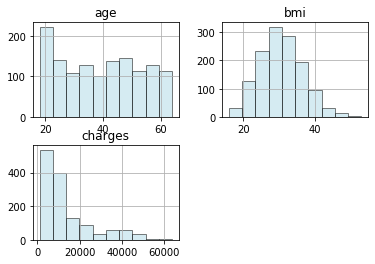

In [29]:
mydata2=mydata[['bmi','age','charges']].copy()
plt.figure(figsize= (10,8))
mydata2.hist(color='lightblue', edgecolor = 'black',alpha=0.5)

##### Distribution of bmi

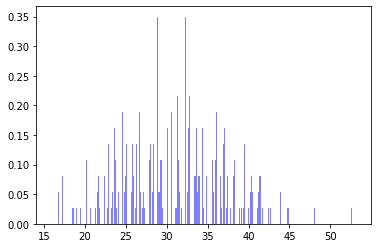

In [30]:
num_bins = mydata['bmi'].count()
plt.hist(mydata['bmi'], num_bins, density=1, facecolor='blue', alpha=0.5)
plt.show()

##### Distribution of age

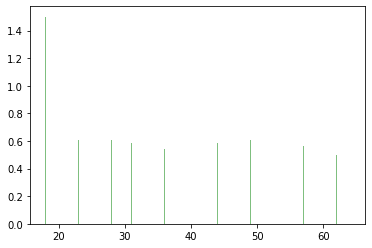

In [31]:
num_bins = mydata['age'].count()
plt.hist(mydata['age'], num_bins, density=1, facecolor='green', alpha=0.5)
plt.show()

##### Distribution of Charges

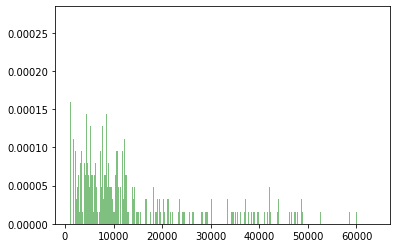

In [32]:
num_bins = mydata['charges'].count()
plt.hist(mydata['charges'], num_bins, density=1, facecolor='green', alpha=0.5)
plt.show()

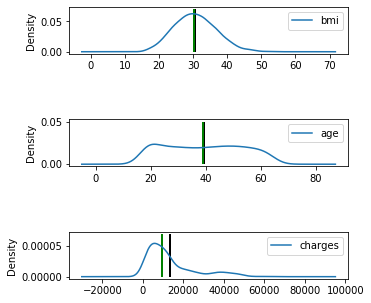

In [33]:
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(5,1,1) 
mydata[['bmi']].plot(kind="density", figsize=(5,5), ax=ax1)
plt.vlines(mydata[['bmi']].mean(), ymin=0, ymax=0.07, linewidth=2.0, color='black')
plt.vlines(mydata[['bmi']].median(), ymin=0, ymax=0.07, linewidth=2.0, color='green')

ax2 = fig.add_subplot(5,1,3) 
mydata[['age']].plot(kind="density", figsize=(5,5), ax=ax2)
plt.vlines(mydata[['age']].mean(), ymin=0, ymax=0.05, linewidth=2.0, color='black')
plt.vlines(mydata[['age']].median(), ymin=0, ymax=0.05, linewidth=2.0, color='green')

ax3 = fig.add_subplot(5,1,5) 
mydata[['charges']].plot(kind="density", figsize=(5,5), ax=ax3)
plt.vlines(mydata[['charges']].mean(), ymin=0, ymax=0.00007, linewidth=2.0, color='black')
plt.vlines(mydata[['charges']].median(), ymin=0, ymax=0.00007, linewidth=2.0, color='green')

Answer: BMI is in normally distributed with central tendency, not much left skewness is present.Very few people with lower bmi exists in the dataframe.

Age - This attribute tells highest participation is done by the age around 20yrs old customers. Though the data is slightly more for higher age people.Age seems distributed quiet uniformly.

Charges - High left skewness in the dataframe tells mostly less individual medical costs is billed by health insurance.Charges are highly skewed.

#### Task 3.F Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [34]:
mydata2.skew()

bmi        0.284047
age        0.055673
charges    1.515880
dtype: float64

In [35]:
mydata2.kurt()

bmi       -0.050732
age       -1.245088
charges    1.606299
dtype: float64

Answer: Skew for BMI is very less as seen in the previous step. Age is uniformly distributed and there's hardly any skew.Charges are highly skewed

#### Task 3.G Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

##### Using Standard Deviation

In [36]:
from numpy import mean
from numpy import std
data_mean,data_sd=mean(mydata2),std(mydata2)
cut_off=data_sd*3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers_bmi=[x for x in mydata2['bmi'] if x < lower['bmi'] or x > upper['bmi']]
outliers_age=[x for x in mydata2['age'] if x < lower['age'] or x > upper['age']]
outliers_charges=[x for x in mydata2['charges'] if x < lower['charges'] or x > upper['charges']]
print("Outliers in BMI is ",len(outliers_bmi))
print("Outliers in Age is ",len(outliers_age))
print("Outliers in Charges is ",len(outliers_charges))
print("\n")
print("Using SD, total outliers are ", (len(outliers_bmi)+len(outliers_age)+len(outliers_charges)))

Outliers in BMI is  4
Outliers in Age is  0
Outliers in Charges is  7


Using SD, total outliers are  11


##### Using Box Plots

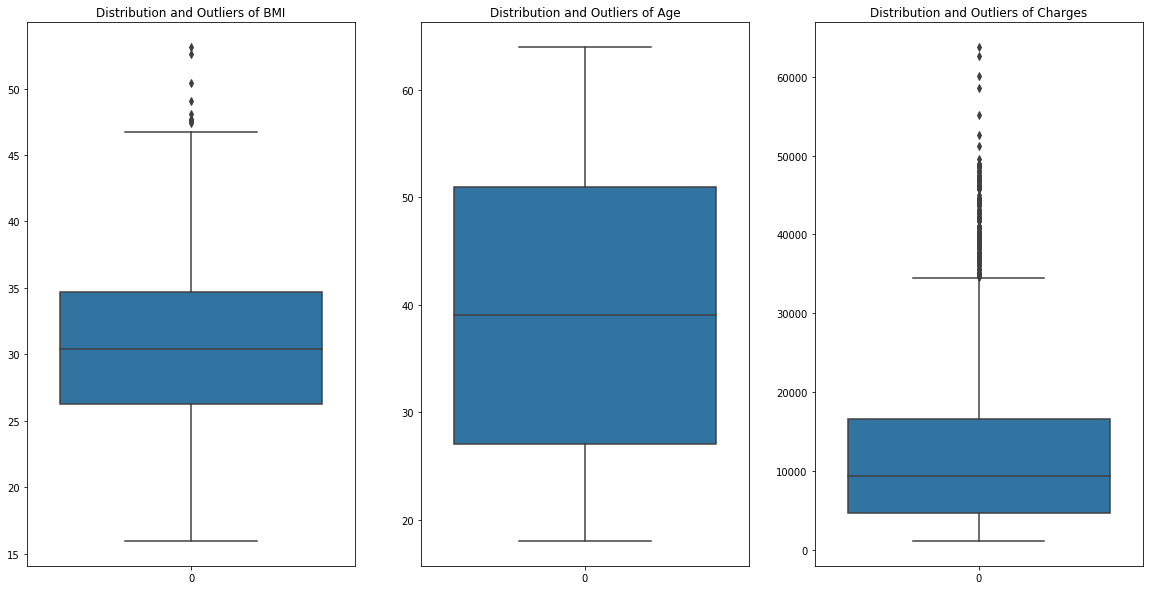

In [37]:
f,ax = plt.subplots(1,3,figsize=(20,10))
ax[0].set_title('Distribution and Outliers of BMI')
ax[1].set_title('Distribution and Outliers of Age')
ax[2].set_title('Distribution and Outliers of Charges')
sns.boxplot(data=mydata2['bmi'], ax=ax[0])
sns.boxplot(data=mydata2['age'], ax=ax[1])
sns.boxplot(data=mydata2['charges'], ax=ax[2])

##### Using Strip Plot and counting outliers

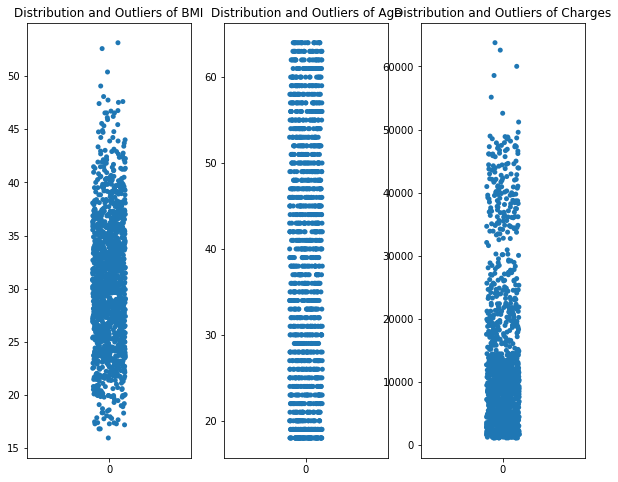

In [38]:
f,ax = plt.subplots(1,3,figsize=(10,8))
ax[0].set_title('Distribution and Outliers of BMI')
ax[1].set_title('Distribution and Outliers of Age')
ax[2].set_title('Distribution and Outliers of Charges')
sns.stripplot(data=mydata2['bmi'],ax=ax[0])
sns.stripplot(data=mydata2['age'],ax=ax[1])
sns.stripplot(data=mydata2['charges'],ax=ax[2])

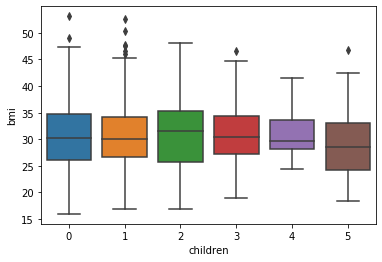

In [39]:
sns.boxplot(x='children',y='bmi',data=mydata)

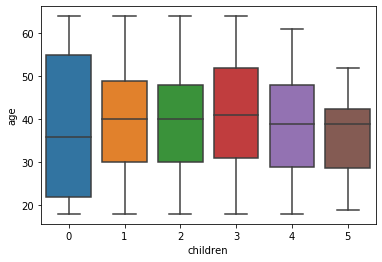

In [40]:
sns.boxplot(x='children',y='age',data=mydata)

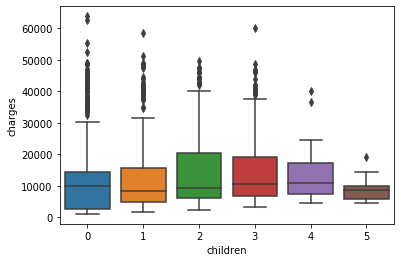

In [41]:
sns.boxplot(x='children',y='charges',data=mydata)

###### Actual calculation of outliners

In [42]:
iqr = np.subtract(*np.percentile(mydata['charges'], [75, 25]))
print(iqr)

11899.625365


In [43]:
# identify outliers for charges
q25, q75 = np.percentile(mydata['charges'], 25), np.percentile(mydata['charges'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in mydata['charges'] if x < lower or x > upper]
print('Identified outliers for charges out of 1338: %d' % len(outliers))

Identified outliers for charges out of 1338: 139


In [44]:
# identify outliers for bmi

q25, q75 = np.percentile(mydata['bmi'], 25), np.percentile(mydata['bmi'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in mydata['bmi'] if x < lower or x > upper]
print('Identified outliers for bmi out of 1338 records: %d' % len(outliers))

Identified outliers for bmi out of 1338 records: 9


In [45]:
# identify outliers for age

q25, q75 = np.percentile(mydata['age'], 25), np.percentile(mydata['age'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in mydata['age'] if x < lower or x > upper]
print('Identified outliers for age out of 1338 records: %d' % len(outliers))

Identified outliers for age out of 1338 records: 0


Answer: BMI has less extreme values which tells that very less people have bmi out the range compared to mean. Charges as it is highly skewed, there are quiet a lot of extreme values. Shows rarely people gave high charges. No outlier in age attribute.

#### Task 3.H Distribution of categorical columns (include children) 

In [46]:
catdb=mydata[['sex','children','smoker','region']]
catdb.head(5)

,sex,children,smoker,region
0,female,0,yes,southwest
1,male,1,no,southeast
2,male,3,no,southeast
3,male,0,no,northwest
4,male,0,no,northwest


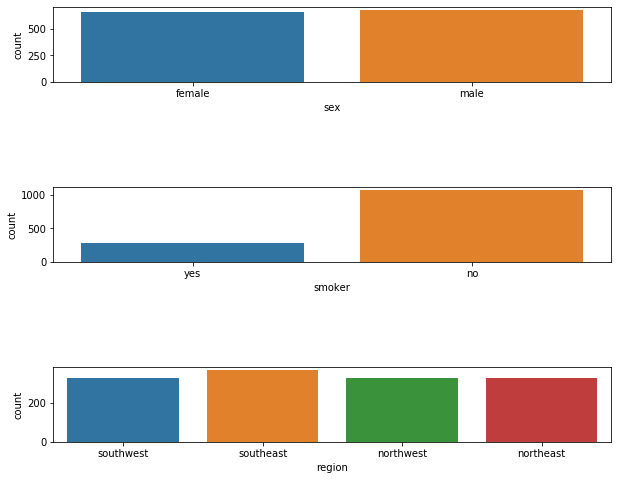

In [47]:
fig = plt.figure(figsize=(10,8))

ax1 = fig.add_subplot(5,1,1) 
sns.countplot(data = catdb, x = 'sex', ax=ax1)

ax2 = fig.add_subplot(5,1,3) 
sns.countplot(data = catdb, x = 'smoker', ax=ax2)

ax3 = fig.add_subplot(5,1,5) 
sns.countplot(data = catdb, x = 'region', ax=ax3)

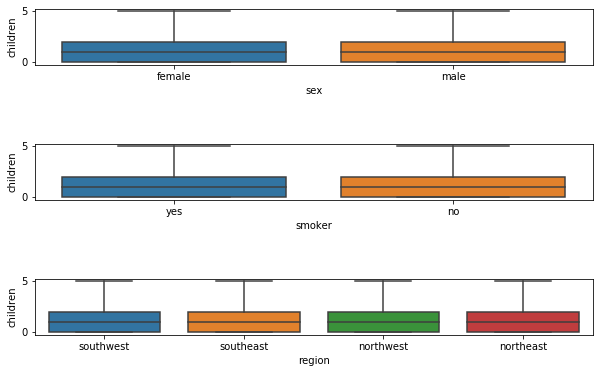

In [48]:
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(5,1,1) 
sns.boxplot(x='sex',y='children',data=catdb, ax=ax1)

ax2 = fig.add_subplot(5,1,3) 
sns.boxplot(x='smoker',y='children',data=catdb, ax=ax2)

ax3 = fig.add_subplot(5,1,5) 
sns.boxplot(x='region',y='children',data=catdb, ax=ax3)

##### Mapping the character to factor variable

In [49]:
mydata3=pd.read_csv('insurance.csv')
mydata3.sex = mydata3.sex.map({'female':1, 'male':0})
mydata3.smoker = mydata3.smoker.map({'yes':1, 'no':0})
ds_reg = pd.get_dummies(mydata3['region'])
mydata3 = mydata3.join(ds_reg.iloc[:,0:3])
mydata3['logcharges'] = np.log(mydata3.charges)

Text(0.5, 1.0, 'Distribution of regions')

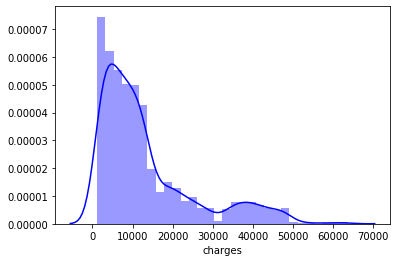

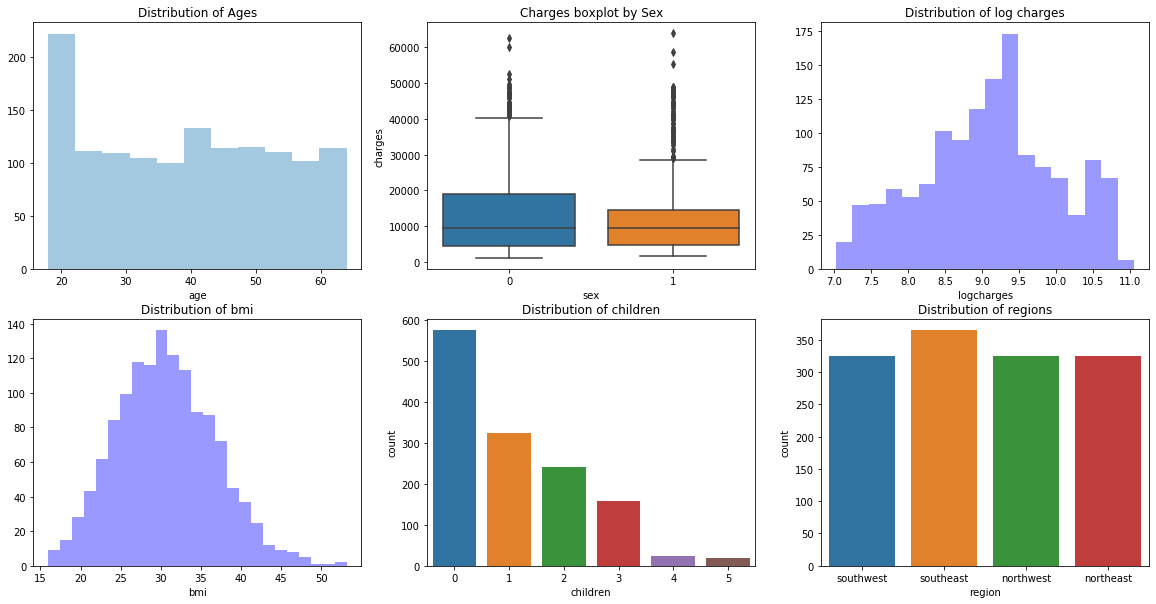

In [50]:
mydata3['logcharges'] = np.log(mydata3.charges)
mydata4 = mydata3.drop(['charges'],axis=1)
sns.distplot(mydata3['charges'], color='b')
f,ax = plt.subplots(2,3,figsize=(20,10))
sns.distplot(mydata4["age"], kde=False, ax=ax[0,0])
sns.boxplot(x='sex',y='charges', data=mydata3, ax=ax[0,1])
sns.distplot(mydata4['logcharges'], ax=ax[0,2], kde=False, color='b')
sns.distplot(mydata4['bmi'],ax=ax[1,0], kde=False, color='b')
sns.countplot('children',data=mydata4, ax=ax[1,1])
sns.countplot('region',data=mydata4, ax=ax[1,2])

ax[0,0].set_title('Distribution of Ages')
ax[0,1].set_title('Charges boxplot by Sex')
ax[0,2].set_title('Distribution of log charges')
ax[1,0].set_title('Distribution of bmi')
ax[1,1].set_title('Distribution of children')
ax[1,2].set_title('Distribution of regions')

#### Task 3.I Pair plot that includes all the columns of the data frame

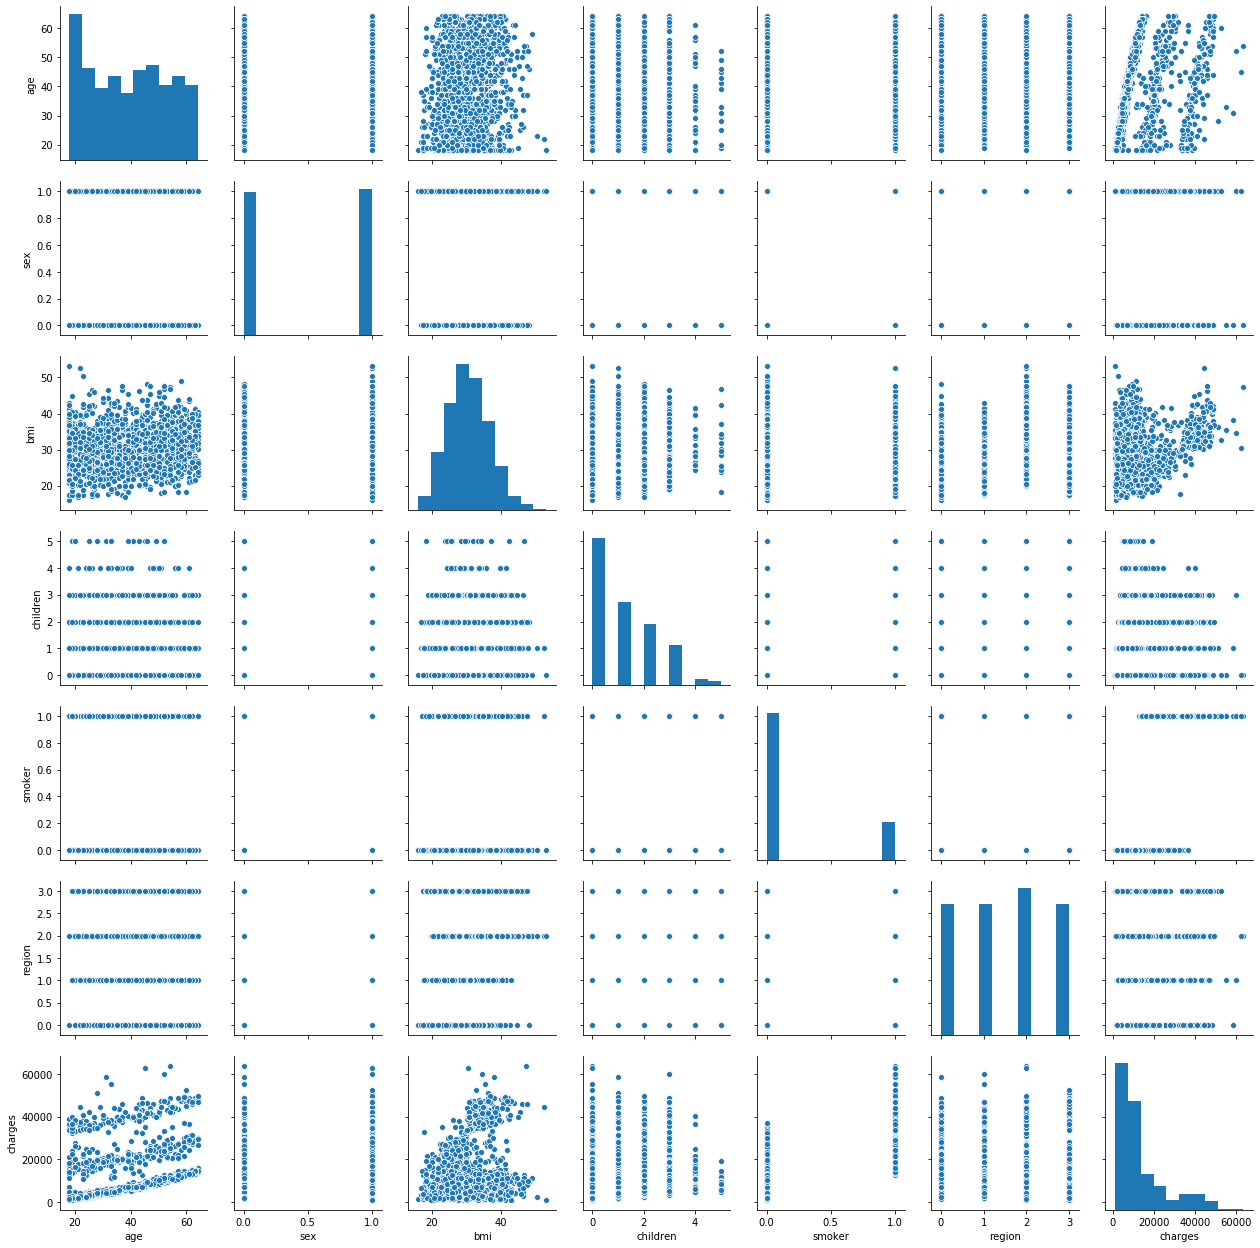

In [51]:
#Label encoding the variables before doing a pairplot because pairplot ignores strings
insurance_df_encoded = mydata.copy()
insurance_df_encoded.loc[:,['sex', 'smoker', 'region']] = mydata.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 

sns.pairplot(insurance_df_encoded)  #pairplot
plt.show()


### Task 4: Answer the following questions with statistical evidence

#### Task 4.A Do charges of people who smoke differ significantly from the people who don't?

In [52]:
var1=mydata[mydata.smoker == 'yes'][['charges']].mean()
var2=mydata[mydata.smoker == 'no'][['charges']].mean()

print('Mean of charges of smokers:', var1)
print('Mean of charges of non-smokers:', var2)

Mean of charges of smokers: charges    32050.231832
dtype: float64
Mean of charges of non-smokers: charges    8434.268298
dtype: float64


In [53]:
var1=mydata[mydata.smoker == 'yes'][['charges']].median()
var2=mydata[mydata.smoker == 'no'][['charges']].median()
print('Median of charges of smokers:', var1)
print('Median of charges of non-smokers:', var2)

Median of charges of smokers: charges    34456.34845
dtype: float64
Median of charges of non-smokers: charges    7345.4053
dtype: float64


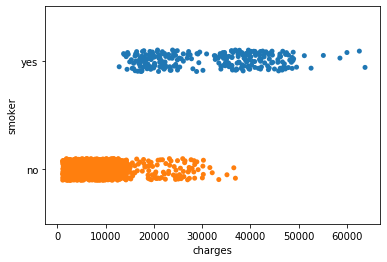

In [54]:
sns.stripplot(mydata['charges'],mydata['smoker'])

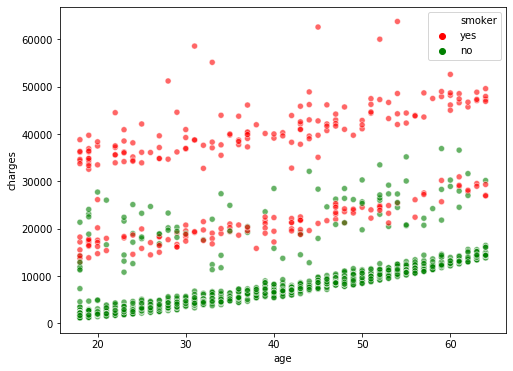

In [55]:
#Scatter plot to look for visual evidence of dependency between attributes smoker and charges accross different ages
plt.figure(figsize=(8,6))
sns.scatterplot(mydata.age, mydata.charges,hue=mydata.smoker,palette= ['red','green'] ,alpha=0.6)
plt.show()

Through visualization we can clearly see that smokers differ significantly from the no-smokers.

In [56]:
#Applying T-test to determine the impact of smoking on the charges.
Ho = "Charges of smoker and non-smoker are same"   
Ha = "Charges of smoker and non-smoker are not the same"
x = np.array(mydata[mydata.smoker == 'yes'].charges) 
y = np.array(mydata[mydata.smoker == 'no'].charges)
t, p_value  = stats.ttest_ind(x,y, axis = 0)
print(p_value)

8.271435842177219e-283


Rejecting the null hypothesis as the p_value is lesser than 0.05. It tells us that the paid charges by the smokers and non-smokers is significantly different.Smokers pay higher charges in comparison to the non-smokers.

Conclusion: Yes, Charges of people who smoke differ significantly from the people who don't.

#### Task 4.B Does bmi of males differ significantly from that of females?

In [57]:
var1=mydata[mydata.sex == 'male'][['bmi']].mean()
var2=mydata[mydata.sex == 'female'][['bmi']].mean()

print('Mean of BMI of Males:', var1)
print('Mean of BMI of Females:', var2)

Mean of BMI of Males: bmi    30.943129
dtype: float64
Mean of BMI of Females: bmi    30.377749
dtype: float64


In [58]:
var1=mydata[mydata.sex == 'male'][['bmi']].median()
var2=mydata[mydata.sex== 'female'][['bmi']].median()
print('Median of BMI of Males:', var1)
print('Median of BMI of Females:', var2)

Median of BMI of Males: bmi    30.6875
dtype: float64
Median of BMI of Females: bmi    30.1075
dtype: float64


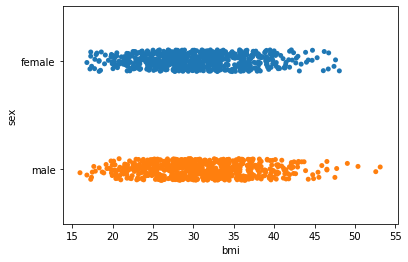

In [59]:
sns.stripplot(mydata['bmi'],mydata['sex'])

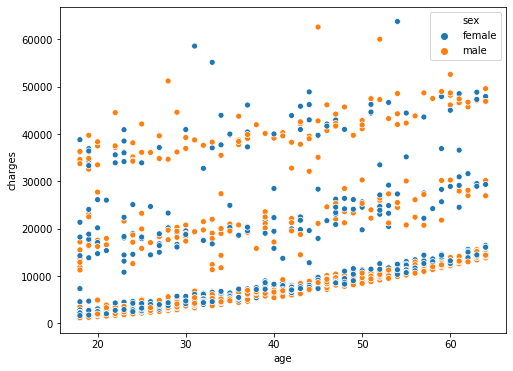

In [60]:
plt.figure(figsize=(8,6))
sns.scatterplot(mydata.age, mydata.charges,hue=mydata.sex  )
plt.show()

Through vizualisation here we can't clearly conclude the relation between age and charges.

In [61]:
###### Check dependency of bmi on gender.#Performing an Independent t-test
Ho = "Gender has no impact on bmi"   
Ha = "Gender has an impact on bmi"   

x = np.array(mydata[mydata.sex == 'male'].bmi)  
y = np.array(mydata[mydata.sex == 'female'].bmi) 

t, p_value  = stats.ttest_ind(x,y, axis = 0)  

print(p_value)

0.08997637178984932


Accepting nullhypothesis as pvalue >0.05. Hence,Gender has no impact on bmi.

Conclusion: No, there is no significant difference between BMI of Males with Females.

#### Task 4.C Is the proportion of smokers significantly different in different genders?

In [62]:
tempdb=mydata.copy()


In [63]:
tot_no_of_smokers= tempdb[tempdb['smoker']=='yes'].shape[0]
tot_no_of_male_smokers=tempdb[tempdb['smoker']=='yes'][tempdb['sex']=='male'].shape[0]
tot_no_of_female_smokers=tempdb[tempdb['smoker']=='yes'][tempdb['sex']=='female'].shape[0]
pro_smokers_male=(tempdb[tempdb['smoker']=='yes'][tempdb['sex']=='male'].shape[0])/(tempdb[tempdb['smoker']=='yes'].shape[0])
pro_smokers_female=(tempdb[tempdb['smoker']=='yes'][tempdb['sex']=='female'].shape[0])/(tempdb[tempdb['smoker']=='yes'].shape[0])

print("Total count of smokers is ",tot_no_of_smokers) 
print("Total count of male smokers is ",tot_no_of_male_smokers ) 
print("Total count of female smokers is ",tot_no_of_female_smokers) 
print("Proportion of smokers who are male is ", pro_smokers_male) 
print("Proportion of smokers who are female is ", pro_smokers_female)

Total count of smokers is  274
Total count of male smokers is  159
Total count of female smokers is  115
Proportion of smokers who are male is  0.5802919708029197
Proportion of smokers who are female is  0.4197080291970803


In [64]:
Ho = "Gender has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Gender has an effect on smoking habits"   # Stating the Alternate Hypothesis
crosstab=pd.crosstab(mydata['sex'],mydata['smoker'])
chi, p_value, dof, expected=stats.chi2_contingency(crosstab)
if p_value<0.05:
    print(f'{Ha} as the p_value ({p_value.round(3)})<0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)})>0.05')
crosstab
print(p_value)

Gender has an effect on smoking habits as the p_value (0.007)<0.05
0.006548143503580696


Rejecting null hypothesis. Hence,smoking habits differs with the gender.

#### Task 4.D Is the distribution of bmi across women with no children, one child and two children, the same?

In [65]:
Ho = "No. of children has no effect on bmi"   # Stating the Null Hypothesis
Ha = "No. of children has an effect on bmi"   # Stating the Alternate Hypothesis
female_df = (mydata[mydata['sex'] == 'female'])

zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']
f_stat, p_value = stats.f_oneway(zero,one,two)
if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

print(p_value)

No. of children has no effect on bmi as the p_value (0.716) > 0.05
0.7158579926754841


Accepting the null hypothesis.Hence,it tells the number of children is not effecting any difference in women bmi.

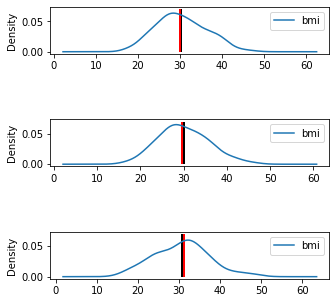

In [66]:
mydata_f = mydata[mydata.sex == 'female']
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(5,1,1)
inc_ch0 = mydata_f[mydata_f.children == 0]
inc_ch0[['bmi']].plot(kind="density", figsize=(5,5), ax=ax1)
plt.vlines(inc_ch0[['bmi']].mean(), ymin=0, ymax=0.07, linewidth=2.0, color='black')
plt.vlines(inc_ch0[['bmi']].median(), ymin=0, ymax=0.07, linewidth=2.0, color='red')

ax2 = fig.add_subplot(5,1,3) 
inc_ch1 = mydata_f[mydata_f.children == 1]
inc_ch1[['bmi']].plot(kind="density", figsize=(5,5), ax=ax2)
plt.vlines(inc_ch1[['bmi']].mean(), ymin=0, ymax=0.07, linewidth=2.0, color='black')
plt.vlines(inc_ch1[['bmi']].median(), ymin=0, ymax=0.07, linewidth=2.0, color='red')

ax3 = fig.add_subplot(5,1,5) 
inc_ch2 = mydata_f[mydata_f.children == 2]
inc_ch2[['bmi']].plot(kind="density", figsize=(5,5), ax=ax3)
plt.vlines(inc_ch2[['bmi']].mean(), ymin=0, ymax=0.07, linewidth=2.0, color='black')
plt.vlines(inc_ch2[['bmi']].median(), ymin=0, ymax=0.07, linewidth=2.0, color='red')


Conclusion: There is no significance on number of children and BMI among females. The distribution of bmi across women with no children, one child and two children are almost similar.